# Projeto Final

## Informações

### Membros

Dimas de Castro Filho - 11201811282

Felipe Moreira Temoteo da Silva - 11201811314

Guilherme Cesario Scagnolato - 11201812319

Kaio Vinícius Souza Santos - 11201810069

Mateus Flosi Molero - 11201811546

Vittoria Ariel dos Santos Borotto - 11201811288


### Dataset

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

## Desenvolvimento

### Configurações inicias

#### Bibliotecas, parametros e datasets

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap, TSNE
from sklearn.neighbors import KNeighborsClassifier, kneighbors_graph
from sklearn import tree as t
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import product
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import graphviz

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# Configuração do plot

%config InlineBackend.figure_format = 'svg'

params = {'figure.figsize': [5, 5],
          'axes.labelsize': 16,
          'axes.titlesize':18,
          'font.size': 16,
          'legend.fontsize': 10,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12
    }

plt.rcParams.update(params)

In [ ]:
#upload do dataset

upload = files.upload()

dataset = pd.read_csv("heart_failure_clinical_records_dataset.csv")

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (1).csv


In [ ]:
#primeiros dados

dataset.head()

age  anaemia  creatinine_phosphokinase  ...  smoking  time  DEATH_EVENT
0  75.0        0                       582  ...        0     4            1
1  55.0        0                      7861  ...        0     6            1
2  65.0        0                       146  ...        1     7            1
3  50.0        1                       111  ...        0     7            1
4  65.0        1                       160  ...        0     8            1

[5 rows x 13 columns]

#### Algoritmos

In [ ]:
cv_strat = StratifiedKFold(n_splits=5) # metodo de separação dos dados
acuracia = make_scorer(accuracy_score) # metrica usada

###### Kneighboards

In [ ]:
# parametros utilizados para treino do Kneighboards

kneighborsClassifier = KNeighborsClassifier()
parametros_kneighbors = dict(n_neighbors=range(3,16,2), algorithm=['auto', 'ball_tree', 'kd_tree', 'brute'] )

kneighbors_simples = RandomizedSearchCV(kneighborsClassifier, parametros_kneighbors, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
kneighbors_literatura = RandomizedSearchCV(kneighborsClassifier, parametros_kneighbors, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
kneighbors_dados = RandomizedSearchCV(kneighborsClassifier, parametros_kneighbors, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)

##### SVC

In [ ]:
# parametros utilizados para treino do SVC

svc = SVC()
parametros_SVC = dict(kernel=['linear', 'rbf', 'sigmoid'], max_iter=[200,300,400],
                      gamma=['scale', 'auto'], probability=[True, False])

svc_simples = RandomizedSearchCV(svc, parametros_SVC, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
svc_literatura = RandomizedSearchCV(svc, parametros_SVC, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
svc_dados = RandomizedSearchCV(svc, parametros_SVC, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)

##### LDA

In [ ]:
# parametros utilizados para treino do LDA

lda = LinearDiscriminantAnalysis()
parametros_lda = dict(solver = ['svd', 'eigen'],shrinkage=['auto'],n_components=[2],store_covariance=[True,False])

lda_simples = RandomizedSearchCV(lda, parametros_lda, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
lda_literatura = RandomizedSearchCV(lda, parametros_lda, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
lda_dados = RandomizedSearchCV(lda, parametros_lda, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)

##### DecisionTree

In [ ]:
# parametros utilizados para treino do DecisionTree

tree = DecisionTreeClassifier()
parametros_tree = dict(criterion=['gini', 'entropy'], splitter=['best', 'random'], 
                                max_features=['auto', 'sqrt', 'log2'], max_depth=[None, range(0,15)],
                                min_samples_split=range(0,20))

tree_simples = RandomizedSearchCV(tree, parametros_tree, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
tree_literatura = RandomizedSearchCV(tree, parametros_tree, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)
tree_dados = RandomizedSearchCV(tree, parametros_tree, cv = cv_strat, scoring=acuracia, random_state=42, n_iter=10)

### Versão Simples

Essa versão visa fazer o uso puro dos dados, com o mínimo de tratamento. Serve como versão de controle, para verficar se os futuros tratamentos irão realmente melhorar a acurácia dos algortimos 

In [ ]:
# Verificando se há dados nulos
dataset.isnull().sum() 

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#separando os dados
target_simples = np.array(dataset['DEATH_EVENT'])
data_simples = dataset.drop('DEATH_EVENT', axis=1)
data_simples = np.array(data_simples)

#### Kneighboards

In [ ]:
#treino
kneighbors_simples.fit(data_simples, target_simples)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(3, 16, 2)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(accuracy_scor

In [ ]:
#melhor acuracia
kneighbors_simples.best_score_

0.6655367231638418

In [ ]:
#melhores parametros
kneighbors_simples.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 15}

#### SVC

In [ ]:
#treino
svc_simples.fit(data_simples, target_simples)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'max_iter': [200, 300, 400],
                 

In [ ]:
#melhor resultado
svc_simples.best_score_

0.6789265536723164

In [ ]:
#melhores parametros
svc_simples.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 300,
 'probability': False,
 'verbose': False}

#### LDA

In [ ]:
#treino
lda_simples.fit(data_simples, target_simples)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',
                                                        store_covariance=False,
                                                        tol=0.0001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_components': [2],
                                        'shrinkage': ['auto'],
                                        'solver': ['svd', 'eigen'],
                                        'store_covariance': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=Fals

In [ ]:
#melhor resultado
lda_simples.best_score_

0.765593220338983

In [ ]:
#melhores parametros
lda_simples.best_params_

{'n_components': 2,
 'shrinkage': 'auto',
 'solver': 'eigen',
 'store_covariance': True}

#### Tree

In [ ]:
#treino
tree_simples.fit(data_simples, target_simples)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0...
                                                    splitter='best'),
    

In [ ]:
#melhor acuracia
tree_simples.best_score_

0.7426553672316385

In [ ]:
#melhores parametros
tree_simples.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 14,
 'splitter': 'best'}

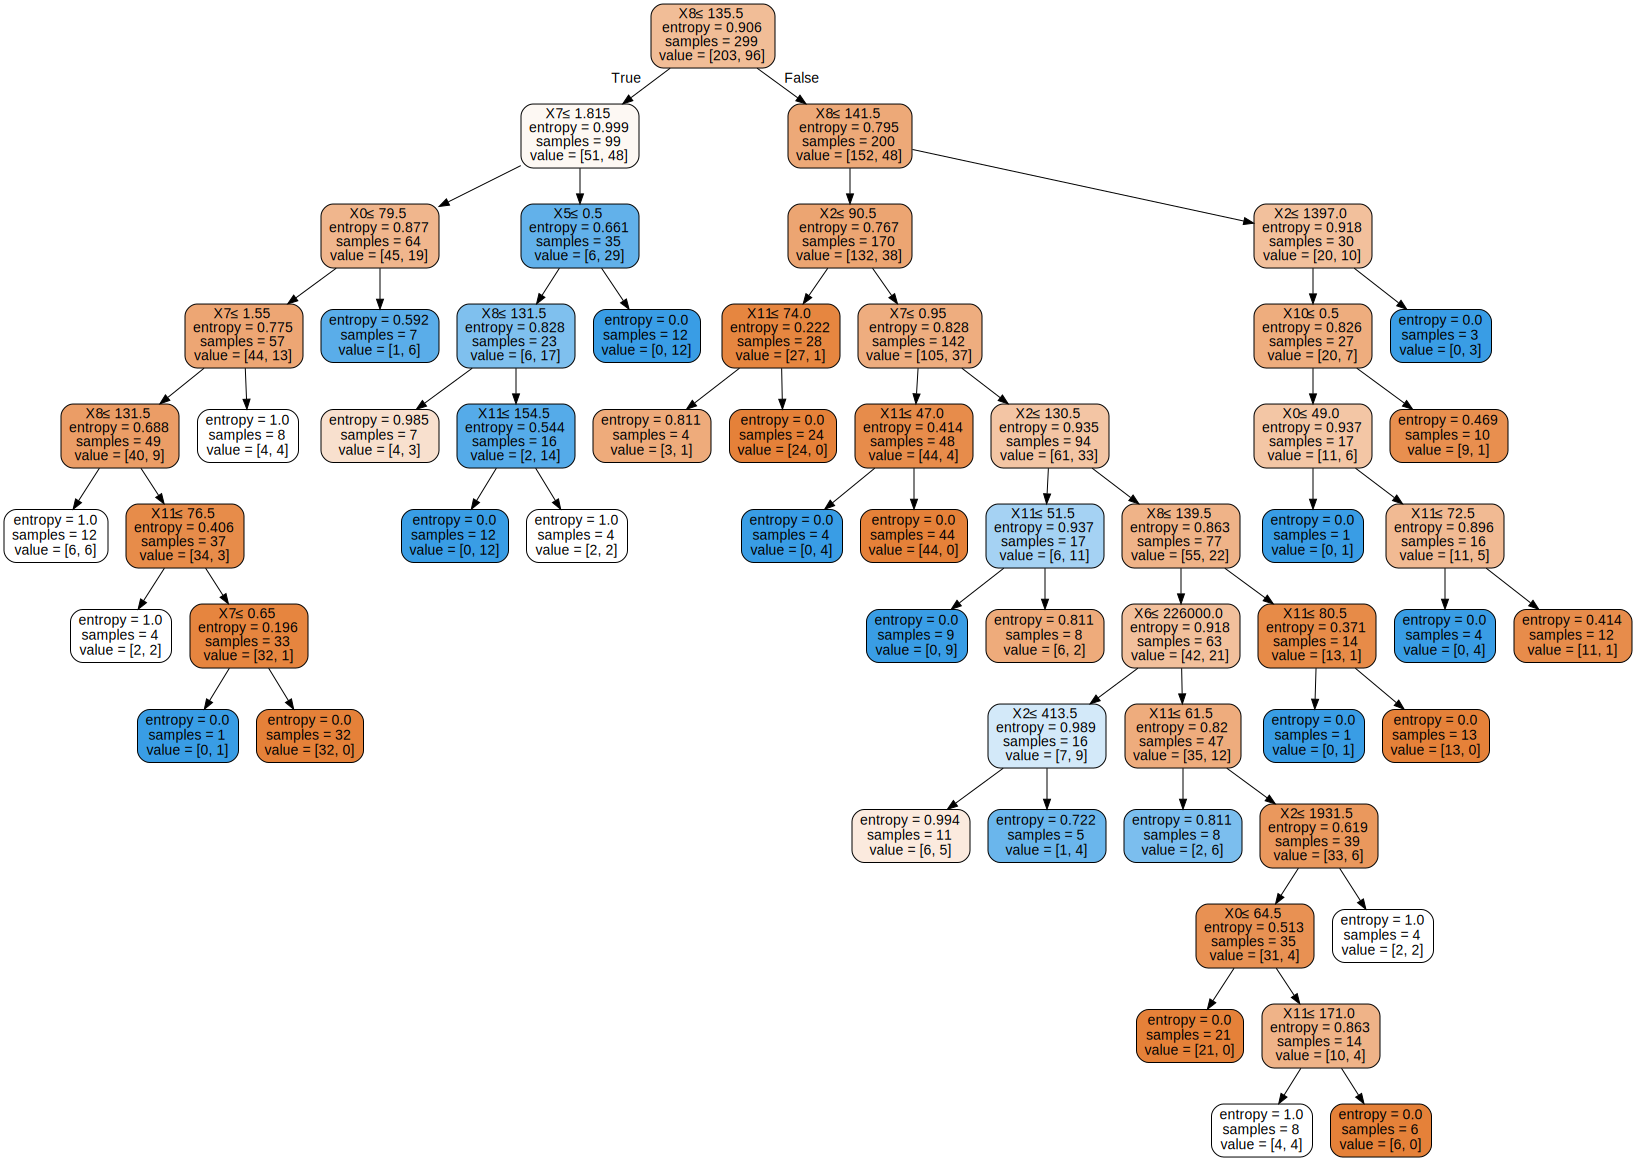

In [ ]:
#plotando arvore
best_tree = tree_simples.best_estimator_

dot_data = t.export_graphviz(best_tree, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)  
graph  

### Versão Baseada na Literatura

Essa versão visa fazer o tratamento baseado nas referencias em artigos cientificos, retirando as features que aparentam ter pouca correlação teorica. Nesse caso serão retiradas as fetures: "creatinine_phosphokinase", "platelets", "serum_creatinine". Além disso, também houve tratamento dos outliers nas features restantes e redução de dimensionalidade 

In [ ]:
#retirando as colunas citadas acima
dataset_literatura = dataset.drop(labels=["creatinine_phosphokinase", "platelets", "serum_creatinine"], axis=1)

In [ ]:
#convertendo tipagem dos dados
dataset_literatura['anaemia'] = dataset_literatura['anaemia'].astype('category')
dataset_literatura['diabetes'] = dataset_literatura['diabetes'].astype('category')
dataset_literatura['high_blood_pressure'] = dataset_literatura['high_blood_pressure'].astype('category')
dataset_literatura['sex'] = dataset_literatura['sex'].astype('category')
dataset_literatura['smoking'] = dataset_literatura['smoking'].astype('category')
dataset_literatura['DEATH_EVENT'] = dataset_literatura['DEATH_EVENT'].astype('category')

In [ ]:
#verificando conversão de dados
dataset_literatura.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  299 non-null    float64 
 1   anaemia              299 non-null    category
 2   diabetes             299 non-null    category
 3   ejection_fraction    299 non-null    int64   
 4   high_blood_pressure  299 non-null    category
 5   serum_sodium         299 non-null    int64   
 6   sex                  299 non-null    category
 7   smoking              299 non-null    category
 8   time                 299 non-null    int64   
 9   DEATH_EVENT          299 non-null    category
dtypes: category(6), float64(1), int64(3)
memory usage: 11.8 KB


#### Retirada de Outlier

Só serão mostrados os gráficos em que foi retirado ao menos um outlier

In [ ]:
#shape original do dataset
dataset_literatura.shape

(299, 10)

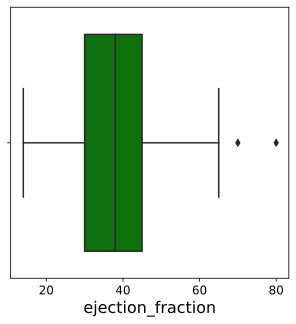

In [ ]:
#plotando boxplot da feature de ejection_fraction
sns.boxplot(x = dataset_literatura['ejection_fraction'], color = 'green')
plt.show()

In [ ]:
dataset_literatura = dataset_literatura[dataset_literatura['ejection_fraction']<65] #tirando outliers
dataset_literatura.shape #novo shape

(296, 10)

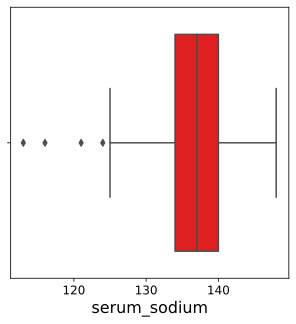

In [ ]:
#plotando boxplot de serum_sodium
sns.boxplot(x = dataset_literatura['serum_sodium'], color = 'red')
plt.show()

In [ ]:
dataset_literatura = dataset_literatura[dataset_literatura['serum_sodium']>125] #tirando outlier
dataset_literatura.shape #novo shape

(291, 10)

In [ ]:
#separando dados
target_literatura = np.array(dataset_literatura['DEATH_EVENT'])
data_literatura = dataset_literatura.drop('DEATH_EVENT', axis=1)
data_literatura = np.array(data_literatura)

#### Redução de dimensionalidade

In [ ]:
# algoritmos utilizados para redução de dimensionalidade do dataset tratado
pca = PCA(n_components = 2)
ica = FastICA(n_components = 2)
iso = Isomap(n_components = 2)
tsne = TSNE(n_components=2)
data_pca_literatura = pca.fit_transform(data_literatura)
data_ica_literatura = ica.fit_transform(data_literatura)
data_iso_literatura = iso.fit_transform(data_literatura)
data_tsne_literatura = tsne.fit_transform(data_literatura)

##### PCA

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com PCA')

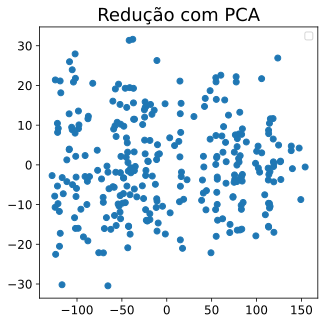

In [ ]:
plt.scatter(data_pca_literatura[:,0], data_pca_literatura[:,1])
plt.legend()
plt.title("Redução com PCA")

##### FastICA

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com FastICA')

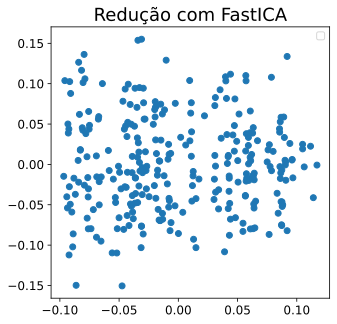

In [ ]:
plt.scatter(data_ica_literatura[:,0], data_ica_literatura[:,1])
plt.legend()
plt.title("Redução com FastICA")

##### Isomap

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com Isomap')

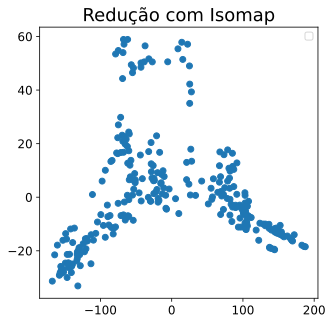

In [ ]:
plt.scatter(data_iso_literatura[:,0], data_iso_literatura[:,1])
plt.legend()
plt.title("Redução com Isomap")

##### TSNE

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com TSNE')

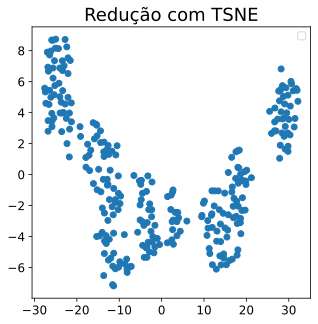

In [ ]:
plt.scatter(data_tsne_literatura[:,0], data_tsne_literatura[:,1])
plt.legend()
plt.title("Redução com TSNE")

#### Algoritmos

##### Kneighboards

In [ ]:
kneighbors_literatura.fit(data_ica_literatura, target_literatura)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(3, 16, 2)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(accuracy_scor

In [ ]:
kneighbors_literatura.best_score_

0.7597895967270603

In [ ]:
kneighbors_literatura.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 13}

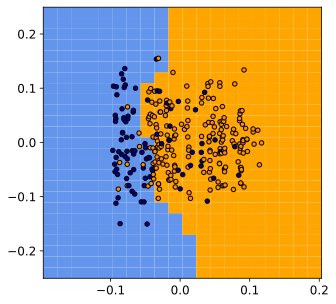

In [ ]:
#plotando knn
best_knn = kneighbors_literatura.best_estimator_

cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = data_ica_literatura[:, 0].min() - 0.1, data_ica_literatura[:, 0].max() +0.1
y_min, y_max = data_ica_literatura[:, 1].min() - 0.1, data_ica_literatura[:, 1].max() +0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),np.arange(y_min, y_max, .02))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(data_ica_literatura[:, 0], data_ica_literatura[:, 1], c=target_literatura, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

##### SVC

In [ ]:
svc_literatura.fit(data_iso_literatura, target_literatura)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'max_iter': [200, 300, 400],
                 

In [ ]:
svc_literatura.best_score_

0.7838690824079485

In [ ]:
svc_literatura.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 300,
 'probability': False,
 'verbose': False}

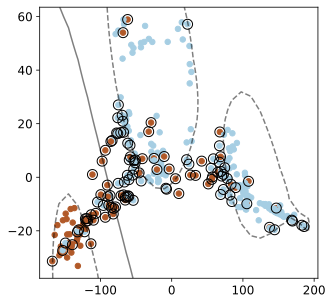

In [ ]:
#plotando svc
best_svc = svc_literatura.best_estimator_

plt.scatter(data_iso_literatura[:, 0], data_iso_literatura[:, 1], c=target_literatura, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(best_svc.support_vectors_[:, 0], best_svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

##### LDA

In [ ]:
lda_literatura.fit(data_iso_literatura, target_literatura)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',
                                                        store_covariance=False,
                                                        tol=0.0001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_components': [2],
                                        'shrinkage': ['auto'],
                                        'solver': ['svd', 'eigen'],
                                        'store_covariance': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=Fals

In [ ]:
lda_literatura.best_score_

0.808240794856809

In [ ]:
lda_literatura.best_params_

{'n_components': 2,
 'shrinkage': 'auto',
 'solver': 'eigen',
 'store_covariance': True}

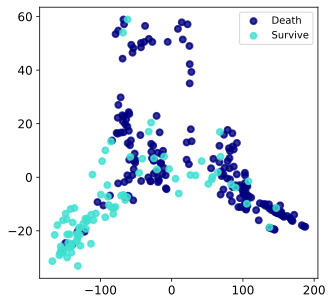

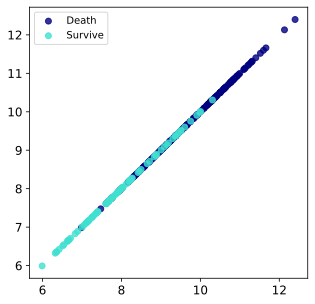

In [ ]:
#plotando lda
best_lda = lda_literatura.best_estimator_

X_r = data_iso_literatura
X_r2 = best_lda.fit(data_literatura, target_literatura).transform(data_literatura)
target_names = ['Death', 'Survive']

plt.figure()
colors = ['navy', 'turquoise']
lw=2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[target_literatura == i, 0], X_r[target_literatura == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[target_literatura == i, 0], X_r2[target_literatura == i, 0], alpha=.8 ,color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

##### Tree

In [ ]:
tree_literatura.fit(dataset_literatura, target_literatura)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0...
                                                    splitter='best'),
    

In [ ]:
tree_literatura.best_score_

0.9758620689655173

In [ ]:
tree_literatura.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 18,
 'splitter': 'random'}

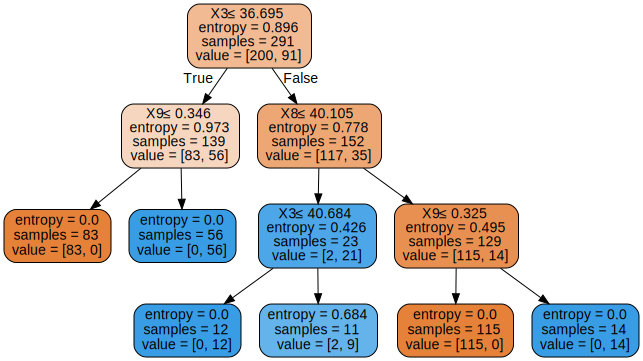

In [ ]:
#plotando arvore
best_tree = tree_literatura.best_estimator_

dot_data = t.export_graphviz(best_tree, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)  
graph  

### Versão Baseada em dados

Essa versão visa fazer o tratamento baseado nos proprios dados do dataset, escolhendo as features que tem maior correlação positiva com o nosso target. Nesse caso foram escolhidos as features: "ejection_fraction", "'serum_creatinine", "serum_sodium", "time", "age".

#### Seleção dos dados

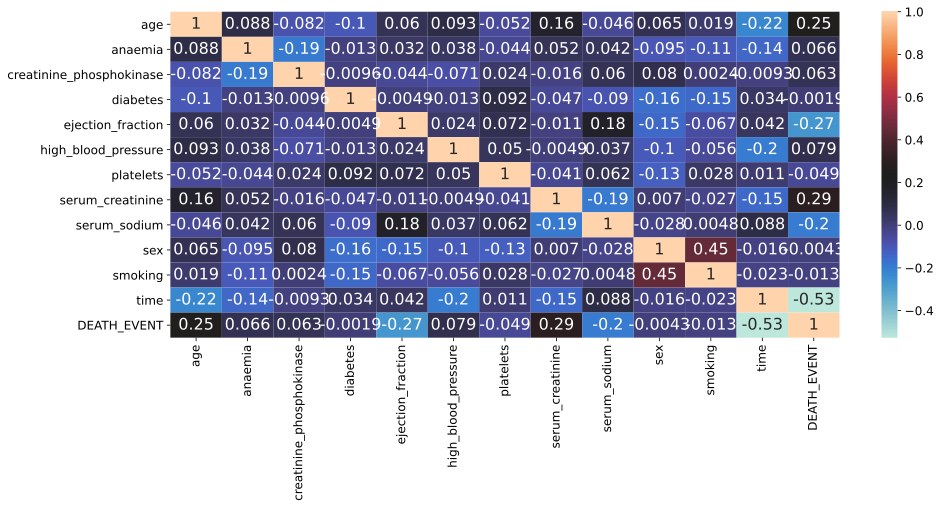

In [ ]:
#matriz confusão
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.heatmap(dataset.corr(), cmap='icefire',annot=True);

In [ ]:
#Atribuindo correlação e verificando quais features estão acima do
#valor absoluto de 0.1, para que tenham pelo menos alguma relevância

corr=dataset.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [ ]:
#dropando todas as features que não serão utilizadas
dataset_dados = dataset.drop(labels=['anaemia', 'creatinine_phosphokinase', 'diabetes', 'high_blood_pressure', 'platelets', 'sex', 'smoking'], axis=1)

#### Retirada dos outliers

In [ ]:
#shape original
dataset_dados.shape

(299, 6)

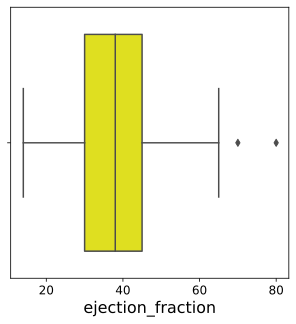

In [ ]:
#plotando boxplot do ejection_fraction
sns.boxplot(x = dataset_dados.ejection_fraction, color = 'yellow')
plt.show()

In [ ]:
dataset_dados = dataset_dados[dataset_dados['ejection_fraction']<68] #retirando outlier
dataset_dados.shape #novo shape

(297, 6)

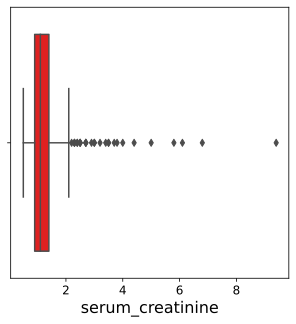

In [ ]:
#plotando boxplot do serum_creatinine
sns.boxplot(x = dataset_dados.serum_creatinine, color = 'red')
plt.show()

In [ ]:
dataset_dados = dataset_dados[dataset_dados['serum_creatinine']<2.1] #tirando outlier
dataset_dados.shape #novo shape

(264, 6)

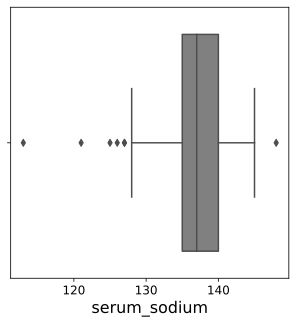

In [ ]:
# plotando boxplot do serum_sodium
sns.boxplot(x = dataset_dados.serum_sodium, color = 'gray')
plt.show()

In [ ]:
dataset_dados = dataset_dados[dataset_dados['serum_sodium']>125] #tirando outlier
dataset_dados = dataset_dados[dataset_dados['serum_sodium']<148] #tirando outlier
dataset_dados.shape #novo shape

(260, 6)

#### Redução de dimensionalidade

In [ ]:
# separando os dados
target_dados = np.array(dataset_dados['DEATH_EVENT'])
data_dados = dataset_dados.drop('DEATH_EVENT', axis=1)
data_dados = np.array(data_dados)

In [ ]:
#reduzindo dimensionalidade
pca = PCA(n_components = 2)
ica = FastICA(n_components = 2)
iso = Isomap(n_components = 2)
tsne = TSNE(n_components=2)
data_pca_dados = pca.fit_transform(data_dados)
data_ica_dados = ica.fit_transform(data_dados)
data_iso_dados = iso.fit_transform(data_dados)
data_tsne_dados = tsne.fit_transform(data_dados)

##### PCA

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com PCA')

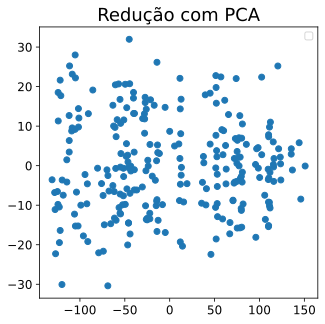

In [ ]:
plt.scatter(data_pca_dados[:,0], data_pca_dados[:,1])
plt.legend()
plt.title("Redução com PCA")

##### FastICA

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com FastICA')

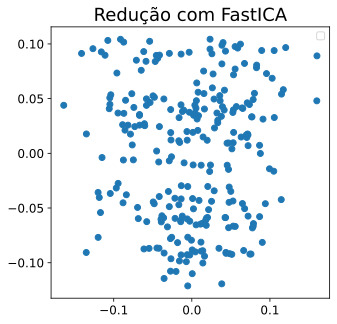

In [ ]:
plt.scatter(data_ica_dados[:,0], data_ica_dados[:,1])
plt.legend()
plt.title("Redução com FastICA")

##### Isomap

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com Isomap')

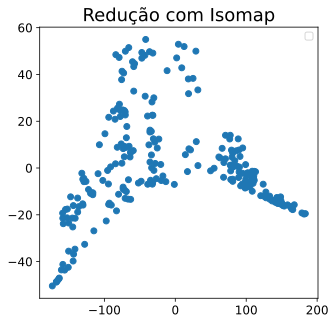

In [ ]:
plt.scatter(data_iso_dados[:,0], data_iso_dados[:,1])
plt.legend()
plt.title("Redução com Isomap")

##### TSNE

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Redução com TSNE')

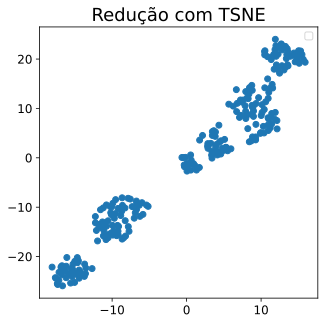

In [ ]:
plt.scatter(data_tsne_dados[:,0], data_tsne_dados[:,1])
plt.legend()
plt.title("Redução com TSNE")

Optamos por seguir com a redução feita pelo algoritmo TSNE, pelo formato dos dados e também pelas dimensões baixas nos eixos

#### Kneighboards

In [ ]:
kneighbors_dados.fit(data_tsne_dados, target_dados)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': range(3, 16, 2)},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False,
                   scoring=make_scorer(accuracy_scor

In [ ]:
kneighbors_dados.best_score_

0.7961538461538462

In [ ]:
kneighbors_dados.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 15}

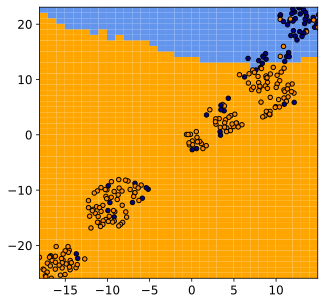

In [ ]:
#plotando knn
best_knn = kneighbors_dados.best_estimator_

cmap_light = ListedColormap(['orange', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

x_min, x_max = data_tsne_dados[:, 0].min(), data_tsne_dados[:, 0].max()
y_min, y_max = data_tsne_dados[:, 1].min(), data_tsne_dados[:, 1].max()
xx, yy = np.meshgrid(np.arange(x_min, x_max),np.arange(y_min, y_max))
Z = best_knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(data_tsne_dados[:, 0], data_tsne_dados[:, 1], c=target_dados, cmap=cmap_bold,edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()


#### SVC

In [ ]:
svc_dados.fit(data_ica_dados, target_dados)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf', 'sigmoid'],
                                        'max_iter': [200, 300, 400],
                 

In [ ]:
svc_dados.best_score_

0.8153846153846154

In [ ]:
svc_dados.best_params_

{'decision_function_shape': 'ovo',
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': 300,
 'probability': False,
 'verbose': False}

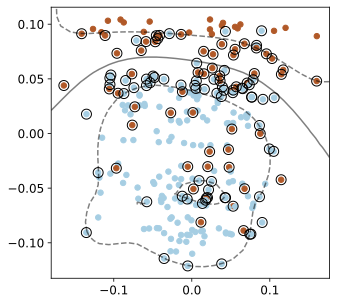

In [ ]:
#plotando svc
best_svc = svc_dados.best_estimator_

plt.scatter(data_ica_dados[:, 0], data_ica_dados[:, 1], c=target_dados, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = best_svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(best_svc.support_vectors_[:, 0], best_svc.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

#### LDA

In [ ]:
lda_dados.fit(data_iso_dados, target_dados)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',
                                                        store_covariance=False,
                                                        tol=0.0001),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'n_components': [2],
                                        'shrinkage': ['auto'],
                                        'solver': ['svd', 'eigen'],
                                        'store_covariance': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=Fals

In [ ]:
lda_dados.best_score_

0.8115384615384615

In [ ]:
lda_dados.best_params_

{'n_components': 2,
 'shrinkage': 'auto',
 'solver': 'eigen',
 'store_covariance': True}

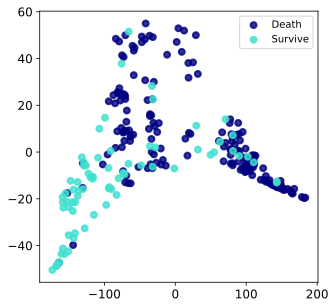

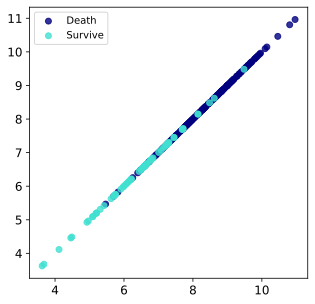

In [ ]:
#plotando lda
best_lda = lda_dados.best_estimator_

X_r = data_iso_dados
X_r2 = best_lda.fit(data_dados, target_dados).transform(data_dados)
target_names = ['Death', 'Survive']

plt.figure()
colors = ['navy', 'turquoise']
lw=2

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[target_dados == i, 0], X_r[target_dados == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r2[target_dados == i, 0], X_r2[target_dados == i, 0], alpha=.8 ,color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show()

#### Tree

In [ ]:
tree_dados.fit(dataset_dados, target_dados)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0...
                                                    splitter='best'),
    

In [ ]:
tree_dados.best_score_

0.9807692307692306

In [ ]:
tree_dados.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 16,
 'splitter': 'random'}

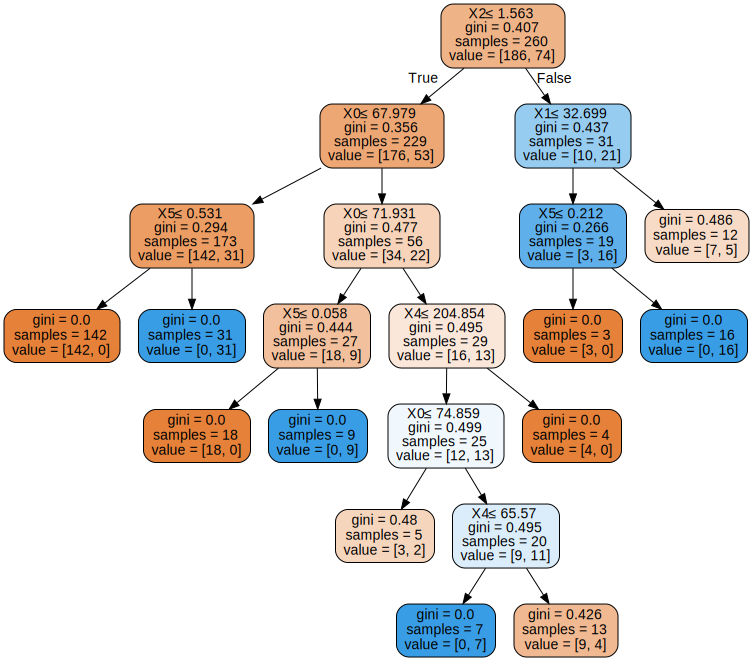

In [ ]:
#plotando arvore
best_tree = tree_dados.best_estimator_

dot_data = t.export_graphviz(best_tree, out_file=None,   
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)  
graph  

## Gráficos

### Diferença entre algoritmos

O código a seguir visa fazer um comparativo entre os códigos utilizados nesse notebook, não sendo os resultados oficiais. Treinando o mesmo grupo de dados para todos. Serve para verificar que os algoritmos tem resultados diferentes.

In [ ]:
X = data_iso_literatura
y = target_literatura

# Treino dos classificadores
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
clf4 = LinearDiscriminantAnalysis(n_components=1) 

clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
clf4.fit(X, y)

#Plotagem
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy=np.meshgrid(np.arange(x_min,x_max,0.1), np.arange(y_min,y_max,0.1))

f,axarr=plt.subplots(2,2,sharex='col',sharey='row',figsize=(10,8))

for idx,clf,tt in zip(product([0,1],[0,1]), [clf1,clf2,clf3,clf4], ['Decision Tree (depth=4)','KNN (k=5)','SVC','LDA (n=1)']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0],idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0],idx[1]].scatter(X[:,0], X[:,1], c=y ,s=20)
    axarr[idx[0],idx[1]].set_title(tt)

plt.show()

### Entre versões

O código a seguir é um comparativo entre os melhores resultados obtidos durante a execução do notebook

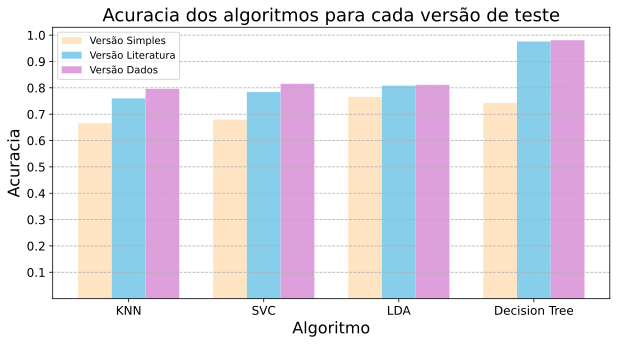

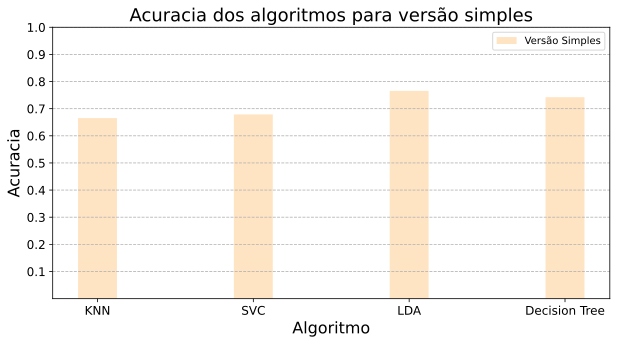

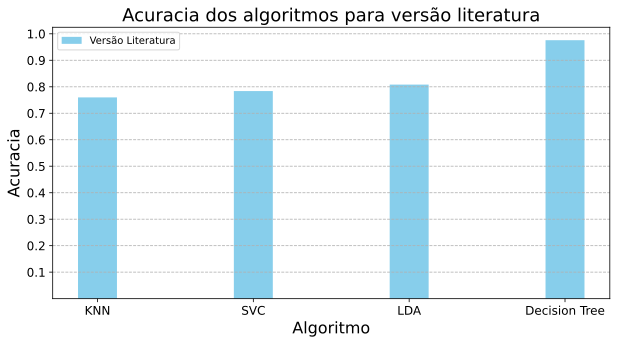

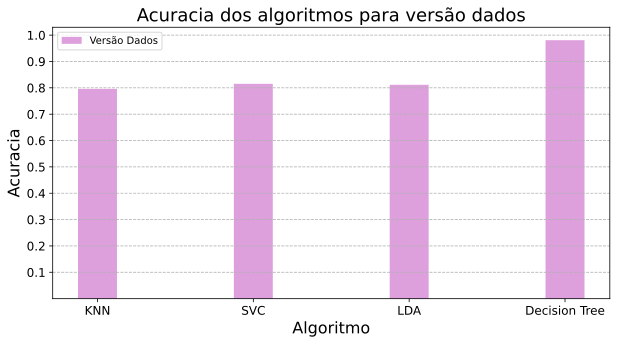

In [ ]:
warm_start = True

acuracia_simples = [kneighbors_simples.best_score_ , svc_simples.best_score_ , lda_simples.best_score_ , tree_simples.best_score_]
acuracia_literatura = [kneighbors_literatura.best_score_, svc_literatura.best_score_, lda_literatura.best_score_, tree_literatura.best_score_]
acuracia_dados = [kneighbors_dados.best_score_, svc_dados.best_score_, lda_dados.best_score_, tree_dados.best_score_]

barWidth = 0.25
fig.tight_layout()
plt.figure(figsize=(10,5))

r1 = np.arange(len(acuracia_simples))
r2 = [x+barWidth for x in r1]
r3 = [x+barWidth for x in r2]

plt.grid(axis="y", linestyle='--')
plt.bar(r1, acuracia_simples, color='bisque', width=barWidth, label = 'Versão Simples')
plt.bar(r2, acuracia_literatura, color='skyblue', width=barWidth, label = 'Versão Literatura')
plt.bar(r3, acuracia_dados, color='plum', width=barWidth, label = 'Versão Dados')

plt.xlabel('Algoritmo')
plt.xticks([r + barWidth for r in range(len(acuracia_simples))], ['KNN', 'SVC', 'LDA', 'Decision Tree'])
plt.ylabel('Acuracia')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Acuracia dos algoritmos para cada versão de teste')

plt.legend()
plt.show()

################# Versão Simples

barWidth = 0.25
fig.tight_layout()
plt.figure(figsize=(10,5))

r1 = np.arange(len(acuracia_simples))

plt.grid(axis="y", linestyle='--')
plt.bar(r1, acuracia_simples, color='bisque', width=barWidth, label = 'Versão Simples')

plt.xlabel('Algoritmo')
plt.xticks(np.arange(4), ['KNN', 'SVC', 'LDA', 'Decision Tree'])
plt.ylabel('Acuracia')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Acuracia dos algoritmos para versão simples')

plt.legend()
plt.show()

################# Versão Literatura

barWidth = 0.25
fig.tight_layout()
plt.figure(figsize=(10,5))

r1 = np.arange(len(acuracia_simples))

plt.grid(axis="y", linestyle='--')
plt.bar(r1, acuracia_literatura, color='skyblue', width=barWidth, label = 'Versão Literatura')


plt.xlabel('Algoritmo')
plt.xticks(np.arange(4), ['KNN', 'SVC', 'LDA', 'Decision Tree'])
plt.ylabel('Acuracia')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Acuracia dos algoritmos para versão literatura')

plt.legend()
plt.show()

################# Versão Dados

barWidth = 0.25
fig.tight_layout()
plt.figure(figsize=(10,5))

r1 = np.arange(len(acuracia_simples))

plt.grid(axis="y", linestyle='--')
plt.bar(r1, acuracia_dados, color='plum', width=barWidth, label = 'Versão Dados')


plt.xlabel('Algoritmo')
plt.xticks(np.arange(4), ['KNN', 'SVC', 'LDA', 'Decision Tree'])
plt.ylabel('Acuracia')
plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.title('Acuracia dos algoritmos para versão dados')

plt.legend()
plt.show()






## Referencias

### Redução de dimensionalidade

[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

[FastICA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html)

[Isomap](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html?highlight=isomap#sklearn.manifold.Isomap)

[TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE)



### Algoritmos de classificação

[SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html?highlight=svc#sklearn.svm.SVC)

[LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html?highlight=lineardiscriminantanalysis#sklearn.discriminant_analysis.LinearDiscriminantAnalysis)

[Kneighbors](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighbors#sklearn.neighbors.KNeighborsClassifier)

[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn.tree.DecisionTreeClassifier)

### Algoritmos de automação

[Make Scorer](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html?highlight=make_scorer#sklearn.metrics.make_scorer)

[Acuracia](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html?highlight=accuracy_score#sklearn.metrics.accuracy_score)

[StratifieldKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold)

[RandomizedSeacrchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV)

### Inspirações para a plotagem dos gráficos

[Comparação entre algoritmos](https://scikit-learn.org/0.20/auto_examples/ensemble/plot_voting_decision_regions.html#sphx-glr-auto-examples-ensemble-plot-voting-decision-regions-py)

[SVC](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

[KNN](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)

[LDA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_lda.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-lda-py)

[Tree](https://scikit-learn.org/stable/modules/tree.html)


### Inspiração para a versão de dados

[Dataset](https://www.kaggle.com/nayansakhiya/heart-fail-analysis-and-quick-prediction)